In [31]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization
from sklearn import preprocessing # data normalization

import warnings
warnings.filterwarnings("ignore")

In [32]:
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/output/result.csv")
data.head(10)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,spending_score
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,email,26,jun,303.0,4.0,0.0,0,unknown,0,17
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0,70
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0.0,0,unknown,0,65
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,email,20,may,127.0,3.0,0.0,0,unknown,0,49
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0.0,0,unknown,0,70
5,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,23,apr,163.0,1.0,0.0,0,unknown,1,9
6,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,687.0,4.0,0.0,0,unknown,1,99
7,id_35102,37.0,management,married,tertiary,no,650.0,yes,unknown,email,26,may,210.0,1.0,0.0,0,unknown,0,62
8,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,160.0,2.0,0.0,0,unknown,0,25
9,id_1406,50.0,blue-collar,married,secondary,no,407.0,yes,yes,cellular,7,aug,233.0,2.0,0.0,0,unknown,0,21


In [33]:
data.shape

(45211, 19)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                45211 non-null  object 
 1   customer_age                      45211 non-null  float64
 2   job_type                          45211 non-null  object 
 3   marital                           45211 non-null  object 
 4   education                         45211 non-null  object 
 5   default                           45211 non-null  object 
 6   balance                           45211 non-null  float64
 7   housing_loan                      45211 non-null  object 
 8   personal_loan                     45211 non-null  object 
 9   communication_type                45211 non-null  object 
 10  day_of_month                      45211 non-null  int64  
 11  month                             45211 non-null  object 
 12  last

In [35]:
data=data.fillna(0)

In [36]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

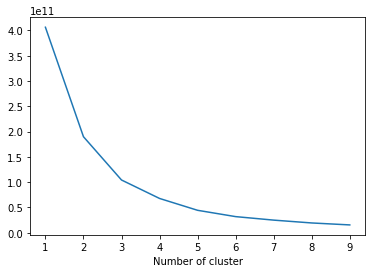

In [37]:
sse={}
data=data.fillna(0)
df_cluster = data[['balance']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [38]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[['balance']])
data['BalanceCluster'] = kmeans.predict(data[['balance']])

In [39]:
data = order_cluster('BalanceCluster', 'balance',data,True)

In [40]:
data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,spending_score,BalanceCluster
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,email,26,jun,303.0,4.0,0.0,0,unknown,0,17,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0,70,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0.0,0,unknown,0,65,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,email,20,may,127.0,3.0,0.0,0,unknown,0,49,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0.0,0,unknown,0,70,0


In [41]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['customer_age']])
data['AgeCluster'] = kmeans.predict(data[['customer_age']])

In [42]:
data = order_cluster('AgeCluster', 'customer_age',data,True)

In [43]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['spending_score']])
data['SpendingCluster'] = kmeans.predict(data[['spending_score']])
data = order_cluster('SpendingCluster', 'spending_score',data,True)

In [44]:
data['OverallScore'] = data['AgeCluster'] + data['BalanceCluster'] + data['SpendingCluster']
data.groupby('OverallScore')['customer_age','balance','spending_score'].mean()

,customer_age,balance,spending_score
OverallScore,,,
0,0.000000,486.927419,20.754032
1,32.099805,516.479721,22.943318
2,38.769999,829.346870,40.907928
3,40.128693,1180.857211,68.097926
4,48.806513,2286.224883,78.498686
5,50.478066,7796.873769,80.046553
6,52.643411,18192.674419,83.604651
7,55.642857,48477.785714,82.000000


In [45]:
data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,spending_score,BalanceCluster,AgeCluster,SpendingCluster,OverallScore
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,email,26,jun,303.0,4.0,0.0,0,unknown,0,17,0,1,0,1
1,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,160.0,2.0,0.0,0,unknown,0,25,0,1,0,1
2,id_36237,18.0,blue-collar,single,secondary,no,420.0,yes,no,cellular,16,apr,478.0,1.0,0.0,0,unknown,1,29,0,1,0,1
3,id_15826,31.0,management,single,tertiary,no,3.0,yes,no,email,9,may,80.0,3.0,0.0,0,unknown,0,23,0,1,0,1
4,id_9411,34.0,services,single,secondary,no,1038.0,no,yes,email,3,jul,89.0,1.0,0.0,0,unknown,0,37,0,1,0,1


In [46]:
data.to_csv("/content/drive/MyDrive/Colab Notebooks/dataset/output/segmentation_data.csv",index=False)